# NBA statistika 

Projekt pri programiranju 1.

Pozdravljeni,

v svoji projektni nalogi bom naredil analizo NBA lige v sezoni 2015/2016.

Struktura projektne naloge je razdeljena na tri dele:
   - PRVI DEL: Vsebuje nekaj osnovnih statističnih podatkov npr.:
                   -povprečen igralec v ligi NBA
                   -najboljši igralec v posamezni kategoriji
                   -igralec, ki je najboljši v največ kategorijah
                   -nekaj podatkov v odvisnosti od starosti igralca
                   
   - DRUGI DEL: Vsebuje statistike, ki so v odvisnosti od plače posameznega igralca:
                   -povprečna plača
                   -najvišje, najnižje plače
                   -plače glede na starost
               
   - TRETJI DEL: Vsebuje raziskavo o tem ali si posamezen igralec res zasluži svojo plačo:
                   -indeksa PIR in PER 
                   -odvisnost plače od indeksa PER
                   -kdo v ligi je preplačan?
                   -kdo v ligi je podplačan?
                   
            

# Zajeti podatki
- osnovna statistika igralcev v ligi:
    - Točke
    - Skoki
    - Asistence
    - Odigrane minute
    - Procent zadetih metov (za 2 in za 3 točke)
    - ...
- indeks PER 
- plače v sezoni 2015/16




Svoje analize glede plač igralcev bom baziral na indeksu PER, ki je najbolj uporabljan indeks v ligi NBA.
Izračun indeksa je izredno zapleten, zato bom podatke o indeksu PER pobral iz spletne strani https://www.basketball-reference.com/ .
Celotna formula je opisana na strani https://en.wikipedia.org/wiki/Player_efficiency_rating .

Indeks PER meri uspešnost igralca v igri, vendar pa upošteva (uravnoteži) njegovo uspešnost glede na 
njegove soigralce, ekipe proti katerim igra, glede na poškodbe nosilcev nasprotnikov,...

Za konec bom poiskal igralce, ki so najbolj preplačani in tiste kateri si podplačani, torej tisti, ki prejemajo višjo plačo
kot bi si zaslužili 'na igrišču', ter tiste, ki igrajo zelo dobro, vendar pa niso dovolj plačani.
Ta podatek je namreč zelo pomemben za lastnike moštev, ter trenerje, ko sestavljajo ekipo, saj želijo imeti v svoji ekipi
igralce, ki za čim manj denarja doprinesejo največ k uspehu.


In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

pd.options.display.max_rows = 20
pd.options.display.max_columns = 10

In [2]:
#pd.read_csv("../data_folder/data.csv")
#Podatki_path = r"C:\Users\Injets\Desktop\FAKS\2_LETNIK\Programiranje\PROJEKT_KONCNI\NBApodatki.csv"
Podatki = pd.read_csv('PROJEKT_KONCNI/NBApodatki.csv', encoding='latin1')
del Podatki['Id']
Podatki.index = np.arange(1, len(Podatki)+1)
Podatki

,Igralec,Pozicija,Starost,Ekipa,StTekem,...,UkradeneZoge,Blokade,IzgubljeneZoge,OsebneNapake,TockeNaTekmo
1,Stephen Curry,PG,27,GSW,79,...,2.1,0.2,3.3,2.0,30.1
2,James Harden,SG,26,HOU,82,...,1.7,0.6,4.6,2.8,29.0
3,Kevin Durant,SF,27,OKC,72,...,1.0,1.2,3.5,1.9,28.2
4,DeMarcus Cousins,C,25,SAC,65,...,1.6,1.4,3.8,3.6,26.9
5,LeBron James,SF,31,CLE,76,...,1.4,0.6,3.3,1.9,25.3
6,Damian Lillard,PG,25,POR,75,...,0.9,0.4,3.2,2.2,25.1
7,Anthony Davis,PF,22,NOP,61,...,1.3,2.0,2.0,2.4,24.3
8,DeMar DeRozan,SG,26,TOR,78,...,1.0,0.3,2.2,2.1,23.5
9,Russell Westbrook,PG,27,OKC,80,...,2.0,0.3,4.3,2.5,23.5
10,Paul George,SF,25,IND,81,...,1.9,0.4,3.3,2.8,23.1


Najprej poglejmo kako izgleda povprečni igralec v ligi:

In [15]:
Podatki.mean()

Starost           26.594538
StTekem           54.785714
StZacetih         25.840336
OdigraneMinute    20.160084
ZadetiMeti         3.113235
StPoskusov         6.951891
%MetaIzIgre        0.444091
3Tocke             0.688025
3TockePoskusi      1.963866
%3Tocke            0.297032
                    ...    
%ProstiMeti        0.741426
SkokiVNapadu       0.870378
SkokiVObrambi      2.754832
SkokiSkupaj        3.620378
Asistence          1.826050
UkradeneZoge       0.653361
Blokade            0.415126
IzgubljeneZoge     1.146849
OsebneNapake       1.744538
TockeNaTekmo       8.349370
Length: 26, dtype: float64

Poglejmo, koliko igralcev igra na posameznem položaju:
(C-center, PF-krilni center, F-krilo, G-organizator igre, SG-shooting guard)

In [4]:
Podatki['Pozicija'].value_counts()

PF    103
SG     96
PG     95
SF     93
C      89
Name: Pozicija, dtype: int64

Poglejmo sedaj njaboljših pet igralcev v nekaterih najpomembnejših kategorijah (Tocke, Asistence, Skoki):

In [5]:
Podatki.sort_values('TockeNaTekmo', ascending =False)[['Igralec','TockeNaTekmo']][:5]

,Igralec,TockeNaTekmo
1,Stephen Curry,30.1
2,James Harden,29.0
3,Kevin Durant,28.2
4,DeMarcus Cousins,26.9
5,LeBron James,25.3


In [6]:
Podatki.sort_values('Asistence', ascending =False)[['Igralec','Asistence']][:5]

,Igralec,Asistence
112,Rajon Rondo,11.7
9,Russell Westbrook,10.4
23,John Wall,10.2
28,Chris Paul,10.0
148,Ricky Rubio,8.7


In [7]:
Podatki.sort_values('SkokiSkupaj', ascending = False)[['Igralec','SkokiSkupaj']][:5]

,Igralec,SkokiSkupaj
50,Andre Drummond,14.8
96,DeAndre Jordan,13.8
83,Dwight Howard,11.8
73,Hassan Whiteside,11.8
4,DeMarcus Cousins,11.5


Poglejmo sedaj še delež igralcev po starosti, ki igrajo v ligi:

<IPython.core.display.Javascript object>


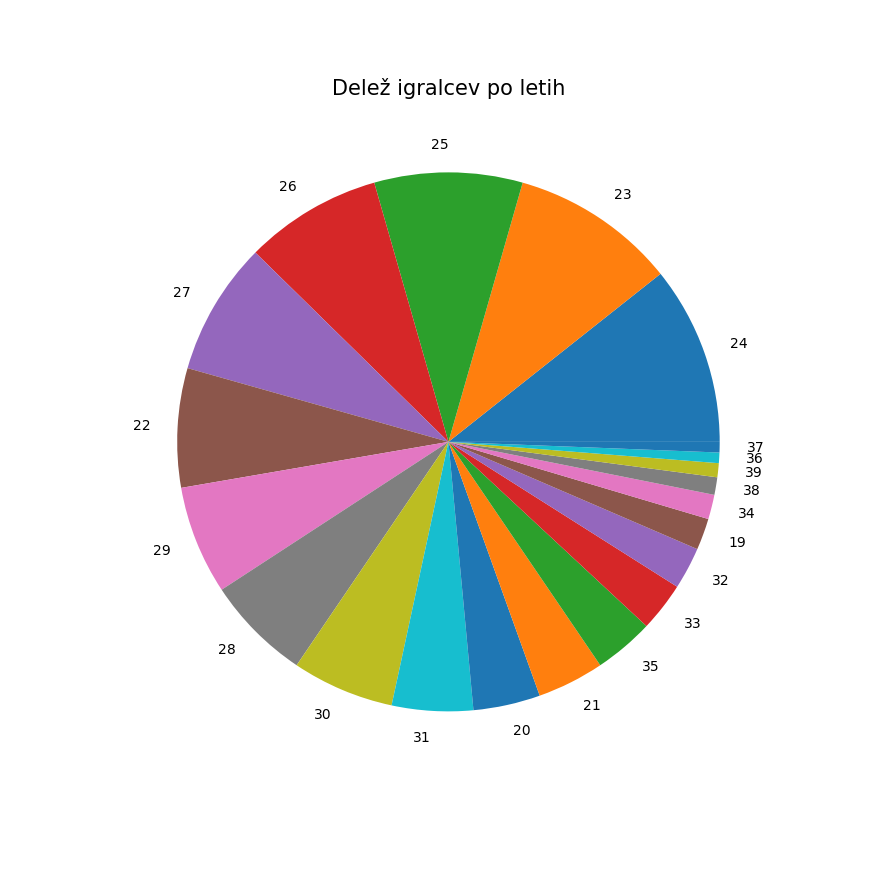

In [9]:
Podatki['Starost'].value_counts().plot(kind='pie', figsize=(7, 7), fontsize=8, title='Delež igralcev po letih')
plt.ylabel('')

Poiščimo sedaj še najstarejšega igralca v ligi, ki dosega nad 20 točk,
5 asistenc, 3 skoke, ter ima manj kot 5 izgubljenih žog na tekmo. 

In [5]:
Podatki[(Podatki.TockeNaTekmo > 20) & 
        (Podatki.Asistence > 5) &
        (Podatki.SkokiSkupaj > 3) & 
        (Podatki.IzgubljeneZoge < 5)][['Igralec', 'Starost', 'Asistence',
                                       'SkokiSkupaj', 'IzgubljeneZoge',
                                       'TockeNaTekmo']].sort_values('Starost', ascending = False)

,Igralec,Starost,Asistence,SkokiSkupaj,IzgubljeneZoge,TockeNaTekmo
5,LeBron James,31,6.8,7.4,3.3,25.3
16,Kyle Lowry,29,6.4,4.7,2.9,21.2
1,Stephen Curry,27,6.7,5.4,3.3,30.1
9,Russell Westbrook,27,10.4,7.8,4.3,23.5
2,James Harden,26,7.5,6.1,4.6,29.0
22,Eric Bledsoe,26,6.1,4.0,3.5,20.4
6,Damian Lillard,25,6.8,4.0,3.2,25.1
18,Kemba Walker,25,5.2,4.4,2.1,20.9


To je LeBron James s 31 leti, najmlajši tak igralec pa je Kemba Walker s 25 leti.

Poglejmo sedaj še malo drugačno statistiko in sicer bomo poiskali povprečno strarost 
igralcev na posamezni igralni poziciji (C,SF ,PF, F, SG, PG). (Praviloma imajo igralci na centerskih pozicijah ter na položaji napadalca daljše kariere, saj na teh pozicijah ni potrebna eksplozivnost, ki z leti izjemno hitro pada.)

In [16]:
PodatkiPozicija = Podatki.groupby('Pozicija')
PodatkiPozicija.mean()

,Starost,StTekem,StZacetih,OdigraneMinute,ZadetiMeti,...,UkradeneZoge,Blokade,IzgubljeneZoge,OsebneNapake,TockeNaTekmo
Pozicija,,,,,,,,,,,
C,27.168539,53.797753,28.044944,18.474157,3.017978,...,0.483146,0.860674,1.080899,2.039326,7.564045
PF,26.553398,53.689320,23.310680,18.032039,2.837864,...,0.500000,0.503883,0.885437,1.732039,7.349515
PG,26.684211,53.852632,25.484211,21.456842,3.324211,...,0.847368,0.174737,1.620000,1.647368,9.129474
SF,26.397849,55.752688,26.752688,21.169892,3.083871,...,0.705376,0.324731,1.021505,1.696774,8.468817
SG,26.208333,56.864583,25.979167,21.744792,3.316667,...,0.733333,0.232292,1.141667,1.627083,9.262500


Vidimo zanimiv rezultat: starost igralcev na vseh igralnih položajih je skoraj enaka. Razlika med starostjo igralcev an položaju centra je za manj kot leto višja od igralcev na ostalih položajih. Zanimivo, saj je to v nasprotju 
s prepričanjem, ki se pojavlja v košarkaških krogih. 
Vseeno pa lahko vidimo, da Centri dosegajo nekoliko manj točk na tekmo, kot igralci na zunanjih položajih, ter 
zagrešijo nekoliko več osebnih napak, kar pa je logično, saj je njihova naloga obramba pod košem, kjer pride do veliko več prerivanja ter 'moške igre'.
(Opomba: Razliko manj kot eno leto v povprečni starosti igralcev na določenem položaju ne štejemo, kot velike razlike.)


Tabeli igralcev in njihovi statistiki bomo pridružili tabelo plač v sezoni 2105/2016:

In [6]:
Place = pd.read_csv('PROJEKT_KONCNI/Place_csv', encoding='latin1')
Place.index = np.arange(1, len(Place)+1)
Place

,Igralec,Placa
1,Kobe Bryant,25000000
2,LeBron James,22970500
3,Carmelo Anthony,22875000
4,Dwight Howard,22359364
5,Chris Bosh,22192730
6,Chris Paul,21468695
7,Kevin Durant,20158622
8,Derrick Rose,20093064
9,Dwyane Wade,20000000
10,LaMarcus Aldridge,19689000


In [7]:
Podatki_Place = Podatki.merge(Place, on = 'Igralec')
Podatki_Place

,Igralec,Pozicija,Starost,Ekipa,StTekem,...,Blokade,IzgubljeneZoge,OsebneNapake,TockeNaTekmo,Placa
0,Stephen Curry,PG,27,GSW,79,...,0.2,3.3,2.0,30.1,11370786
1,James Harden,SG,26,HOU,82,...,0.6,4.6,2.8,29.0,15756438
2,Kevin Durant,SF,27,OKC,72,...,1.2,3.5,1.9,28.2,20158622
3,DeMarcus Cousins,C,25,SAC,65,...,1.4,3.8,3.6,26.9,15851950
4,LeBron James,SF,31,CLE,76,...,0.6,3.3,1.9,25.3,22970500
5,Damian Lillard,PG,25,POR,75,...,0.4,3.2,2.2,25.1,4236287
6,Anthony Davis,PF,22,NOP,61,...,2.0,2.0,2.4,24.3,7070730
7,DeMar DeRozan,SG,26,TOR,78,...,0.3,2.2,2.1,23.5,10050000
8,Russell Westbrook,PG,27,OKC,80,...,0.3,4.3,2.5,23.5,16744218
9,Paul George,SF,25,IND,81,...,0.4,3.3,2.8,23.1,17120106


Opomba: Tabela je krajša, saj nekateri igralci nimajo podatka za plačo. To se zgodi iz več razlogov: njihova plača ni zapisana, plače ne prejemajo, ali so bili poškodovani veliko večino sezone.

Poglejmo najbolje plačane igralce:

In [47]:
Place[:10]

,Igralec,Placa
1,Kobe Bryant,25000000
2,LeBron James,22970500
3,Carmelo Anthony,22875000
4,Dwight Howard,22359364
5,Chris Bosh,22192730
6,Chris Paul,21468695
7,Kevin Durant,20158622
8,Derrick Rose,20093064
9,Dwyane Wade,20000000
10,LaMarcus Aldridge,19689000


Za zanimivost poglejmo katera igralna pozicija je v povprečju najbolje plačana.

In [63]:
Podatki_Place[['Pozicija', 'Placa']].groupby('Pozicija').mean() 

,Placa
Pozicija,
C,5.518749e+06
PF,5.269881e+06
PG,4.803232e+06
SF,5.270026e+06
SG,4.678203e+06


Igralci na poziciji centra imajo v povprečju nekoliko višjo plačo. Če tukaj poznamo še podatek o tem, da v povprečju višine igralcev padajo z igralno pozicijo v smislu: C > PF > SF > SG > PG, lahko zaključimo, da je plača resnično nekoliko povezana z višino, saj imajo višji igralci nekoliko večjo plačo.

<IPython.core.display.Javascript object>


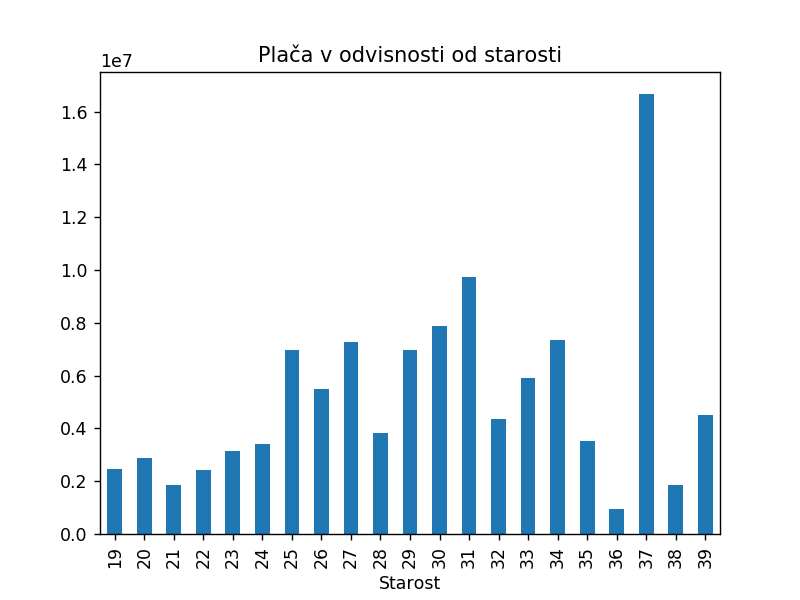

In [10]:
Podatki_Po_Letih = Podatki_Place.groupby('Starost')
Podatki_Po_Letih['Placa'].mean().plot(kind = 'bar', title='Plača v odvisnosti od starosti')

Poglejmo še kako je plača odvisna od starosti. Zanima nas, ali imajo igralci v nekem območju okoli povprečnega igralca približno enako plačo in ali se le-ta spremonja glede na starost. (Opomba: za igralce, ki so stari pod 21 let in starejši od 35 let veljajo posebna določila: veteranski minimum in začetniški maksimum, ki regulirajo višino plače, zato lahko pričakujemo nekoliko odstopanj.)

In [84]:
Podatki_Place[Podatki_Place.Starost == 37][['Igralec', 'Placa']]

,Igralec,Placa
27,Dirk Nowitzki,8333334
32,Kobe Bryant,25000000


Vidimo, da je odstopanje pri 37 letih posledica tega, da sta toliko stara le dva igralca, ki imata oba visoko plačo. Kobe Bryant je celo najbolje plačani igralec v ligi.

Poglejmo še igralce pri 28 letih, saj imajo ti v povprečju nižjo plačo, kot igralci v letih blizu 28. 
Smiselno bi bilo predpostavljati, da bodo ti igralci v poprečju najbolj podplačani, saj imajo skoraj pol manjšo plačo, kot leto ali dve mlajši ter starejši igralci, vendar pa upad kvalitete igre ne more biti faktor, ko gledamo razliko nekaj let, saj po prepričanju poznavalcev košarke igralci dosežejo svoj vrh kariere v letih med 24 in 28, poleg tega pa so popolnoma konkurenčni še po tridesetem letu, večinoma do 32 leta.

Predpostavimo torej, da bodo najbolj podplačani igralci stari 28 let, tekom projektne naloge pa bomo to tezo potrdili ali ovrgli.

In [95]:
Podatki_Place[Podatki_Place.Starost == 28][['Igralec', 'Placa']].sort_values('Placa', ascending = False)

,Igralec,Placa
201,Danny Green,10000000
48,Mike Conley,9588426
181,O.J. Mayo,8000000
119,Ersan Ilyasova,7900000
194,Jodie Meeks,6270000
159,Gerald Henderson,6000000
307,Josh McRoberts,5543725
217,Brandan Wright,5464000
67,Darren Collison,5013559
282,Jonas Jerebko,5000000


Sedaj poglejmo še tabelo indeksov PER (Player efficiency rating). Indeks PER je indeks uspešnosti igralca v ligi NBA,
ki je eden izmed najbolj upoštevanih pokazateljev dobre ali slabe igre posameznika.
Formula za njegov izračun je izjemno zapletena in vsebuje čez 20 spremenljivk, nato pa še obteži izračunani indeks glede na 
različne dejavnike znotraj ekipe.
Indeks je v zadnjem koraku še obtežen glede na povprečje lige, ki je določeno za 15.0.

Podatke o indeksu PER lahko dobimo na vsaki večji spletni strani s podatki o ligi NBA.

Pridružimo tabelo indeksov PER k našim že obstoječim tabelam.
In poglejmo kdo ima najboljši indeks uspešnosti.

In [11]:
Per = pd.read_csv('PROJEKT_KONCNI/PER_csv', encoding='latin1')
Per.index = np.arange(1, len(Per)+1)
Per[:10]

,Igralec,PER
1,Thanasis Antetokounmpo,33.08
2,Rakeem Christmas,32.11
3,Stephen Curry,31.56
4,Kevin Durant,28.25
5,Boban Marjanovic,27.77
6,Russell Westbrook,27.64
7,LeBron James,27.64
8,Chris Paul,26.31
9,Kawhi Leonard,26.11
10,Hassan Whiteside,25.69


Opomba preden nadaljujemo: Prva dva igralca v tabeli imata izjemno visok indeks PER, vendar sta igrala le nekaj minut 
in zato ju ta indeks favorizira.
Kot v pravilih lige NBA bomo indeks upoštevali, samo za igralce, ki so igrali več kjot 6 minut na tekmo in igrali vsaj 200 minut skozi celotno sezono.
V ta namen iz tabele izbrišemo vse igralce, ki so igrali manj kot 6 minut na tekmo ali manj kot 200 minut v celotni szoni.

In [35]:
Podatki_Place_PER = Podatki_Place.merge(Per, on = 'Igralec')
Podatki_Place_PER = Podatki_Place_PER[Podatki_Place_PER.OdigraneMinute > 6]
Podatki_Place_PER = Podatki_Place_PER[(Podatki_Place_PER.StTekem * Podatki_Place_PER.OdigraneMinute) > 200]
Podatki_Place_PER

,Igralec,Pozicija,Starost,Ekipa,StTekem,...,IzgubljeneZoge,OsebneNapake,TockeNaTekmo,Placa,PER
0,Stephen Curry,PG,27,GSW,79,...,3.3,2.0,30.1,11370786,31.56
1,James Harden,SG,26,HOU,82,...,4.6,2.8,29.0,15756438,25.36
2,Kevin Durant,SF,27,OKC,72,...,3.5,1.9,28.2,20158622,28.25
3,DeMarcus Cousins,C,25,SAC,65,...,3.8,3.6,26.9,15851950,23.67
4,LeBron James,SF,31,CLE,76,...,3.3,1.9,25.3,22970500,27.64
5,Damian Lillard,PG,25,POR,75,...,3.2,2.2,25.1,4236287,22.25
6,Anthony Davis,PF,22,NOP,61,...,2.0,2.4,24.3,7070730,25.10
7,DeMar DeRozan,SG,26,TOR,78,...,2.2,2.1,23.5,10050000,21.58
8,Russell Westbrook,PG,27,OKC,80,...,4.3,2.5,23.5,16744218,27.64
9,Paul George,SF,25,IND,81,...,3.3,2.8,23.1,17120106,20.98


Poglejmo najstarejše igralce, znotraj posamezne starosti pa urejene po PER indeksu:

In [36]:
Podatki_Place_PER.sort_values(['Starost', 'PER'], ascending = [False, False])[['Igralec', 'Starost', 'PER']][:10]

,Igralec,Starost,PER
156,Tim Duncan,39,16.98
254,Andre Miller,39,13.42
202,Vince Carter,39,12.75
261,Kevin Garnett,39,12.28
135,Manu Ginobili,38,17.90
27,Dirk Nowitzki,37,19.09
32,Kobe Bryant,37,14.94
267,Rasual Butler,36,13.47
41,Pau Gasol,35,21.76
187,David West,35,17.66


Poglejmo koliko se indeks PER razlikuje med posameznimi igralnimi pozicijami:

In [37]:
Podatki_Place_PER[['Pozicija', 'Starost','PER']].groupby('Pozicija').mean()

,Starost,PER
Pozicija,,
C,26.593220,16.751017
PF,26.781250,15.668594
PG,26.846154,16.047885
SF,26.224490,14.525714
SG,26.523810,14.004048


Tokrat pa opazimo zanimivost: indeks PER je pri centrih kar za 2,5 točke višji kot recimo pri krilih.
Iz tega lahko sklepamo, da ta indeks verjetno nekoliko zapostavlja igralce, ki večinoma mečejo za tri točke ter se malo udeležujejo igre pod košem, saj je ravno to naloga kril, ki imajo najnižje indekse PER.

<IPython.core.display.Javascript object>


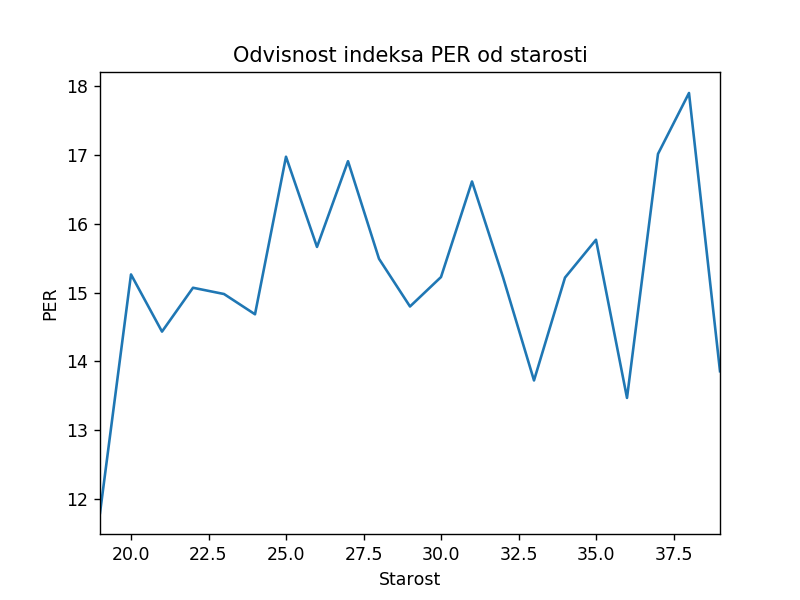

In [39]:
Podatki_Place_PER_Po_Letih = Podatki_Place_PER.groupby('Starost')
Podatki_Place_PER_Po_Letih['PER'].mean().plot(y = 'PER', title = 'Odvisnost indeksa PER od starosti')
plt.ylabel('PER')

Zadnja analiza in graf sta bila bolj za zabavo, saj ne moremo napovedati učinkovitost igralca glede na njegovo starost. Vendar vseeno lahko opazimo veliko špico grafa pri letu 37, kar je starost dveh igralcev: Kobe Bryant in Dirk Nowitzki, ki sta izvrstna igralca in imata oba izjemno visok indeks PER.
Zanimivo pa je, da je opazen upad indeksa PER med 28 in 35 letom, kar je nenavadno, saj se ponavadi šteje, da so igralci v najboljših letih prav med 26 in 30 letom.
Sklepamo lahko da indeks PER favorizira mlajše igralce, ki dosegajo več točk, igrajo napadalnejšo in hitrejšo igro, ter nekoliko zapostavlja starejše igralce, ki igrajo preudarneje ter bolj umirjeno.

Za konec pa resnejša analiza. Izračunali bomo kateri igralci so najbolj preplačani ter kateri najbolj podplačani glede na indeks PER. Najprej pa poglejmo odvisnost plače igralca od PER indeksa.

Ugotoviti želimo, ali so si igralci res 'zaslužili' svojo plačo v sezoni 2015/2016. Podatek ne bo natančnejši saj moramo upoštevati, dve stvari: 
- Igralci podpišejo pogodbo za več let (Ponavadi najmanj dve in največ pet), v povprečju za 3 ali 4 leta, zato je mogoče, da igralec dobi zelo dobro zagotovljeno plačo za celotno obdobje svoje pogodbe, vendar pa mu učinkovitost naslednje leto pade (poškodbe, slabša ekipa, nezadovoljenost z vodstvom kluba, motivacija,...).
- projekcije za plače se predvidevajo za leto vnaprej in zato lastniki klubov ne morejo vedeti koliko lahko ponudijo nekemu igralcu (recimo, da si želijo nekega igralca, ki je v sezoni prej igral dokaj solidno vendar pa si tega igralca želi tudi nek drug klub, zato mora prvi klub dati precej višjo ponudbo, saj se lahko zgodi, da če igralec dobi dve podobni ponudbi izbrere drug klub, ker mu je pač všeč in bo tam imel več motivacije za igranje ter bo tam v naslednji sezoni 'eksplodiral'.).

Vendar pa je PER indeks zastavljen tako, da precej dobro izgladi take nepravilnosti, edina stvar, ki je ne more zgladiti je ta, če ima igralec nizko plačo za naslednjih 5 let ter nato izjemno izboljša svojo igro bo imel izjemno učinkovitost glede na plačo. Takega igralca se seveda splača imeti v svoji ekipi, vendar pa prihodnosti ne moremo napovedovati zato so iskalci talentov, ki najdejo take igralce izjemno cenjeni.

Poglejmo ali v povprečju plača igralca sovpada z njegovo uspešnostjo:

<IPython.core.display.Javascript object>


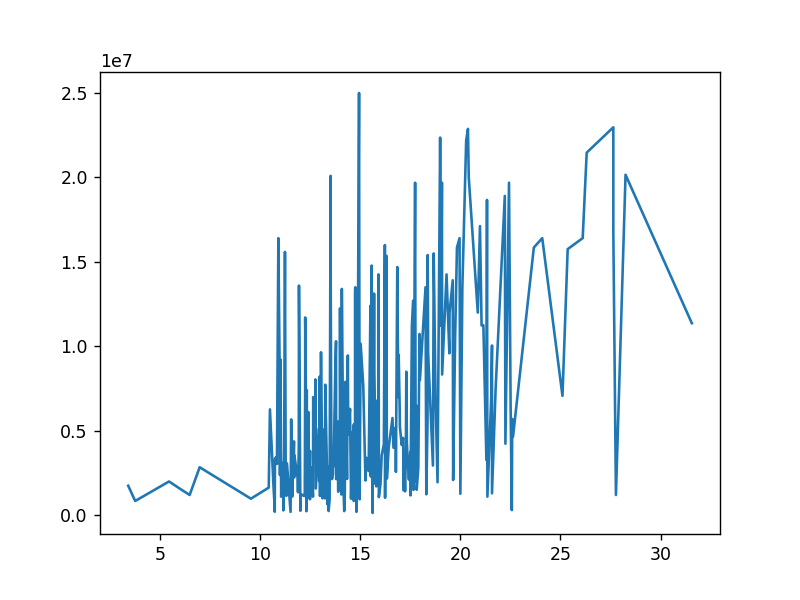

In [40]:
PER1 = Podatki_Place_PER['PER']
Place1 = Podatki_Place_PER['Placa']
PER1, Place1 = zip(*sorted(zip(PER1, Place1), key = lambda x: x[0]))
plt.plot(PER1, Place1)

Zanimivo, plače igralcev so zelo slabo odvisne od indeksa PER.

Za konec pa še zaključna analiza: Kateri so bili najbolj preplačani in kateri najbolj podplačani igralci v ligi NBA v sezoni 2015/2016:

In [54]:
# a = Podatki_Place_PER['Igralec']
# b = Podatki_Place_PER['Starost']
c = Podatki_Place_PER['Placa'] / 1000000
d = Podatki_Place_PER['PER']

Podatki_Place_PER =Podatki_Place_PER.assign(Razmerje = d/c)
Podatki_Place_PER1 = Podatki_Place_PER[['Igralec', 'Starost', 
                                        'PER', 'Pozicija','Ekipa', 
                                        'Placa', 'Razmerje']].sort_values(ascending = False, by='Razmerje')
Podatki_Place_PER1

,Igralec,Starost,PER,Pozicija,Ekipa,Placa,Razmerje
107,Sean Kilpatrick,26,15.62,SG,TOT,134215,116.380434
134,Marcus Thornton,28,14.81,SG,TOT,200600,73.828514
78,Michael Beasley,27,22.57,SF,HOU,306527,73.631360
262,Jason Thompson,29,14.20,C,TOT,245177,57.917341
140,Kevin Martin,32,11.52,SG,TOT,200600,57.427717
254,Andre Miller,39,13.42,PG,TOT,250750,53.519442
247,Chase Budinger,27,10.73,SF,TOT,206192,52.038876
259,Ryan Hollins,31,12.31,C,TOT,239605,51.376223
90,Joe Johnson,34,12.01,SF,TOT,261894,45.858248
268,Anderson Varejao,33,11.16,C,TOT,289755,38.515297


V tabeli zgoraj lahko vidimo rezultat. 

Vendar nismo še zaključili. Rezultat je dober za preplačane igralce, torej tiste, ki so v spodnjem delu tabele. Vidimo pa, da ta analiza 'forsira' igralce, ki imajo izredno nizke plače, ter indeks PER nižji od povprečja lige.
Zato poglejmo najbolj podplačane igralce, ki imajo indeks višji od povprečja glede na katerega je izračunan, torej 15.

In [58]:
Podatki_Place_PER1[Podatki_Place_PER1.PER >15][:10]

,Igralec,Starost,PER,Pozicija,Ekipa,Placa,Razmerje
107,Sean Kilpatrick,26,15.62,SG,TOT,134215,116.380434
78,Michael Beasley,27,22.57,SF,HOU,306527,73.631360
228,Boban Marjanovic,27,27.77,C,SAS,1200000,23.141667
227,Cole Aldrich,27,21.35,C,LAC,1100602,19.398475
127,Nikola Jokic,20,21.58,C,DEN,1300000,16.600000
235,JaVale McGee,28,20.00,C,DAL,1270964,15.736087
160,Jon Leuer,26,16.24,PF,PHO,1035000,15.690821
143,Rudy Gobert,23,17.51,C,UTA,1175880,14.890975
223,Richaun Holmes,22,15.93,PF,PHI,1074169,14.830069
189,Clint Capela,21,18.30,C,HOU,1242720,14.725763


Tako, to so igralci, ki se jih je najbolj splačalo imeti v svoji ekipi v sezoni 2015/2016. Žal pa prihodnosti ne moremo napovedati, tako da lahko za prihodnje sezone le ugibamo ter delamo analize na preteklih podatkih, ki pa kot vemo ne znajo napovedati prihodnosti.

Najlepša hvala za pozornost,

Matija Kerkoč